# Lesson 1 Assignment - EnergyLoads
## Author - Tyler Crosse

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

## Setup

In [36]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

In [7]:
# Read the .csv file with the pandas read_csv method
energy = pd.read_csv(fileName)

## Initial Exploration

In [14]:
energy.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [11]:
energy.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


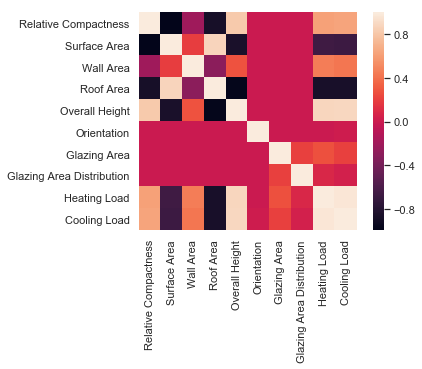

In [31]:
# heatmap
corrmat = energy.corr()
sns.heatmap(corrmat, square=True);

### Heatmap Observations
Positive Correlations:
- Heating Load and Cooling Load my be twins.
- There is a strong correlation betwen the Heating/Cooling Loads with Overall Height and Relative Compactness.
- Overall Height and Relative Compactness are correlated.
- Roof Area and Surface Area are correlated.

Negative Correlations:
- Roof Area and Surface Area with Heating/Cooling Loads, Overall Height and Relative Compactness.


In [24]:
energy.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

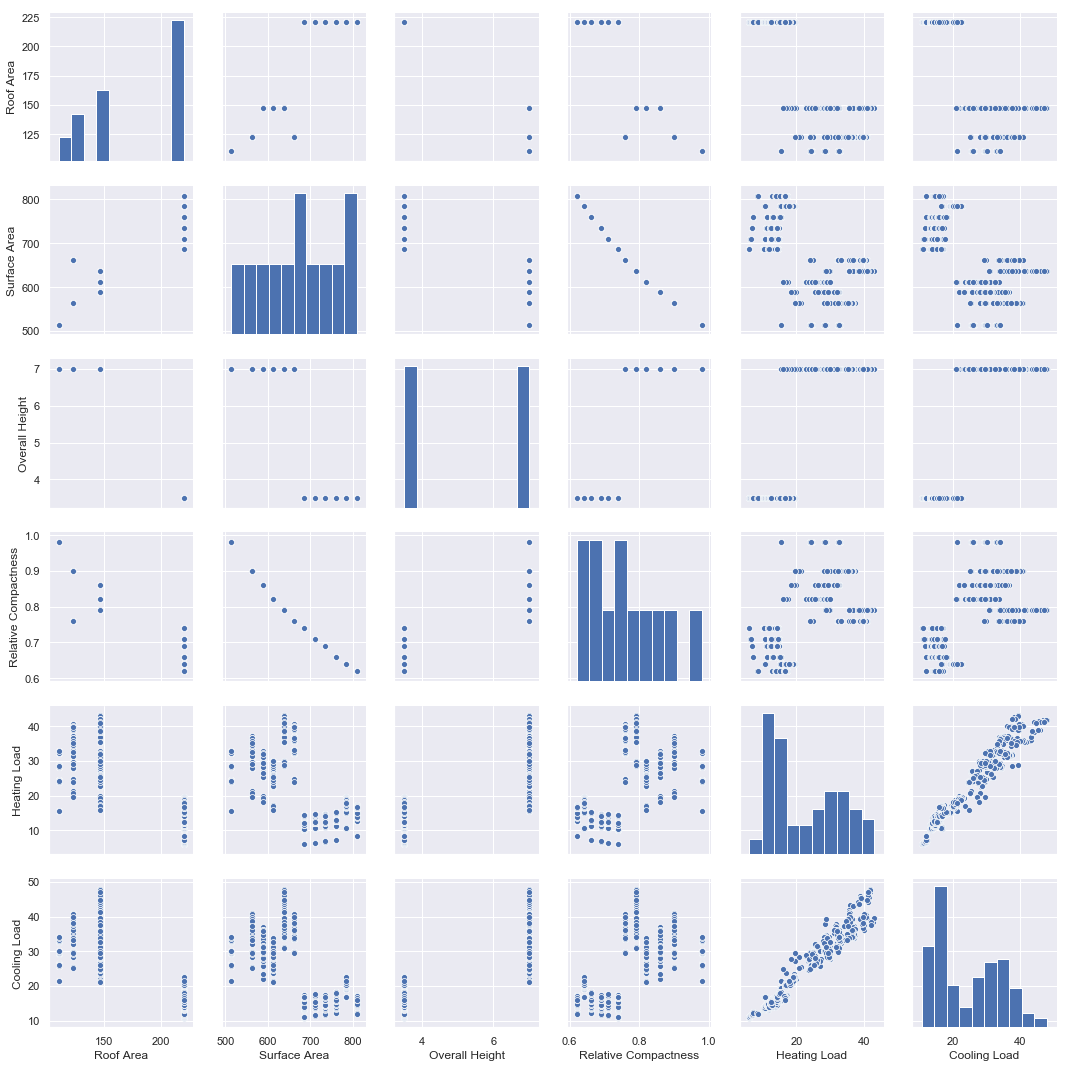

In [30]:
# setup and create scatterplot of intersting relationships
sns.set()
cols = ['Roof Area', 'Surface Area', 'Overall Height', 'Relative Compactness', 'Heating Load', 'Cooling Load']
sns.pairplot(energy[cols])
plt.show();

### Scatterplot observations
- Again Heating and Cooling loads are very tightly correlated
- Relative Compactness is likely just the inverse of Surface Area
- Roof Area and Overall height show a lot of overlap
- The scatterplots of all of the selected variables show what seems like a biomodal distribution with the Heating/Cooling Loads

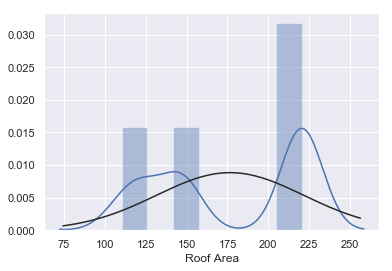

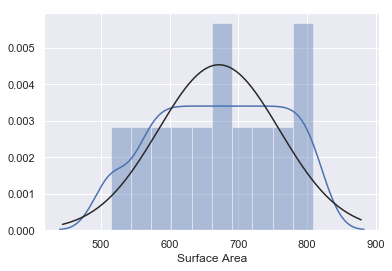

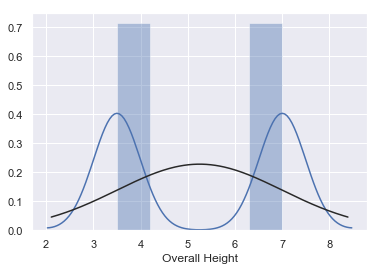

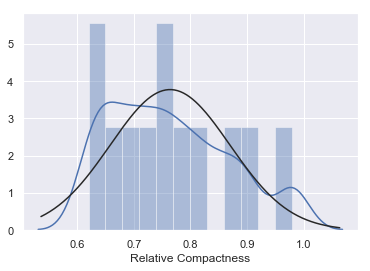

In [43]:
# histogram/pdfs
sns.distplot(energy['Roof Area'], fit=stats.norm);
plt.show();
sns.distplot(energy['Surface Area'], fit=stats.norm);
plt.show();
sns.distplot(energy['Overall Height'], fit=stats.norm);
plt.show();
sns.distplot(energy['Relative Compactness'], fit=stats.norm);
plt.show();